In [45]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BoardInfinity/main/Sales.csv")

In [47]:
df.shape

(200, 5)

In [48]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [49]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [50]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Lets check if Linear relationship exists between IV and TV

In [52]:
sns.set_style("darkgrid")

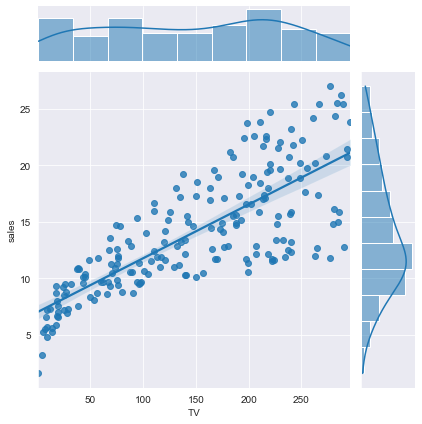

In [53]:
sns.jointplot('TV','sales', data=df, kind='reg');

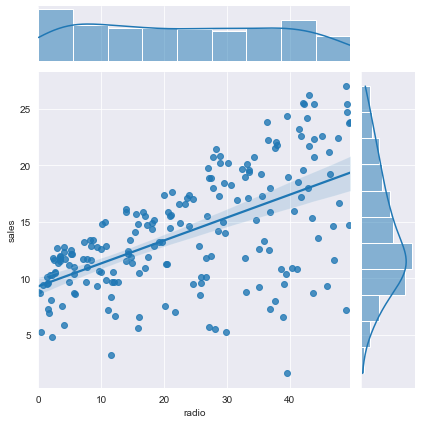

In [54]:
sns.jointplot('radio','sales', data=df, kind='reg');

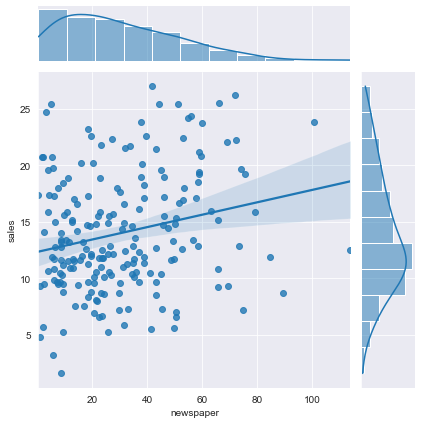

In [55]:
sns.jointplot('newspaper','sales', data=df, kind='reg');

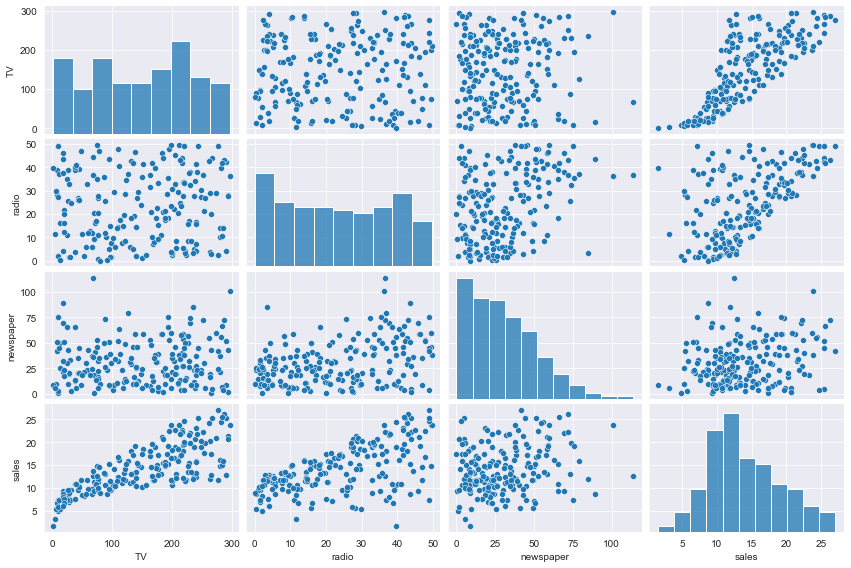

In [56]:
sns.pairplot(df, size=2, aspect=1.5);

In [57]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


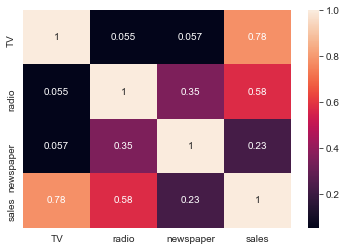

In [58]:
sns.heatmap(df.corr(), annot=True);

In [59]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [61]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [62]:
X = df.iloc[ : , :-1 ]
y = df.iloc[ : , -1 ]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [66]:
X_test.head()

,TV,radio,newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2


In [67]:
type(X_train)

pandas.core.frame.DataFrame

In [68]:
X_train

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [69]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [70]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [71]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [72]:
X_train.columns = ['TV', 'radio', 'newspaper']
X_test.columns = ['TV', 'radio', 'newspaper']

In [73]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [74]:
X_test.head()

,TV,radio,newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2


In [75]:
# Modeling
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [76]:
y_pred_train = regressor.predict(X_train)

y_pred_test = regressor.predict(X_test)

In [77]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [78]:
r2_score(y_train, y_pred_train)

1.0

In [79]:
r2_score(y_test, y_pred_test)

0.9466625462675996

In [80]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [81]:
param_dist = {
    "criterion" : ['mse', 'friedman_mse', 'mae', 'poisson'],
    'max_depth' : range(2,60),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2,20)
}
param_dist

{'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
 'max_depth': range(2, 60),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': range(2, 20)}

In [82]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

gridnew = GridSearchCV(regressor, param_grid=param_dist, n_jobs=-1, cv=5)

gridnew.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 60),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20)})

In [83]:
gridnew.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=11, max_features='auto',
                      random_state=0)

In [84]:
gridnew.best_params_

{'criterion': 'mae',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_split': 2}

In [85]:
gridnew.best_score_

0.9447999283764268

In [86]:
y_pred_gridnew = gridnew.predict(X_test)

In [87]:
y_pred_gridnewtrain = gridnew.predict(X_train)

In [88]:
r2_score(y_test, y_pred_gridnew)

0.9224088604997983

In [89]:
r2_score(y_train, y_pred_gridnewtrain)

0.9994949067951631

# Happy Learning